<a href="https://colab.research.google.com/github/NeveChrono/ML_CodeDump/blob/main/LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Linear Regression

Machine Learning we tend to create models which are used to predict output based on the data provided to them. One of the most basic models which are used to achieve this are called regression models.

Linear Regression is among them the most basic model used to predict the output based on a single feature. This is generally used on data which is linear in nature.

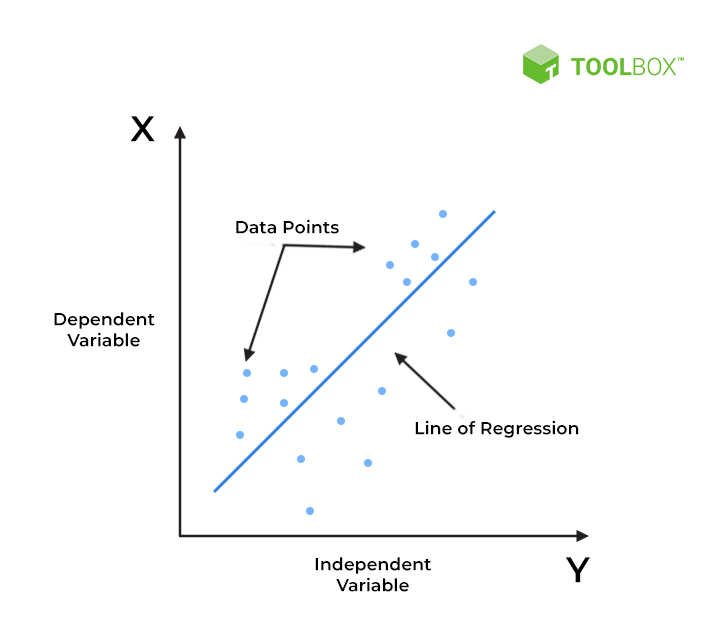

In here we have a sample data and we have to create a line which can perfectly represents these data points. Note that the values that we predict are an estimated values but which have a very less margin of error in them.

Mathematically speaking,

Y = bo + b1 * X

where b0 and b1 are constants and X is feature of the dataset.


# Implementation of Linear Regression


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Importing the dataset

In [9]:
dataset = pd.read_csv("Salary_Data.csv")
# Features of the Dataset
X = dataset.iloc[:,:-1].values
# Output of the dataset
Y = dataset.iloc[:,-1].values


# Spliting the Data into Training and Test Set

In [11]:
# Using the inbuilit library of Scikit learn to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

'''
LinearRegression.fit() method in scikit-learn expects the input features (X_train) to be a 2D array,
where each row represents a sample and each column represents a feature.
'''
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)

# Creating the Linear Regression Model and uplaoding the dataset to it

In [12]:
# To create the model we will be using scikit-learn again as it contains a module called linear_models which contains Class caller LinearRegression
from sklearn.linear_model import LinearRegression

#creating a instance of the Class
l_regressor = LinearRegression()

#uploading the Dataset to the model ie the training set which will run the model ML model

l_regressor.fit(X_train,Y_train) # fit method is a method present in many ML model classes which we can use to train the data for a particular model

LinearRegression()

# Predicting the Results

In [13]:
# Using the predict function after training the dataset using fit method we will use that to predict the output for test set based on it

# This predict will return a vector values so we need to store it inside a new variable called Y_predicted
Y_predicted = l_regressor.predict(X_test)

# Visualising the Training Set

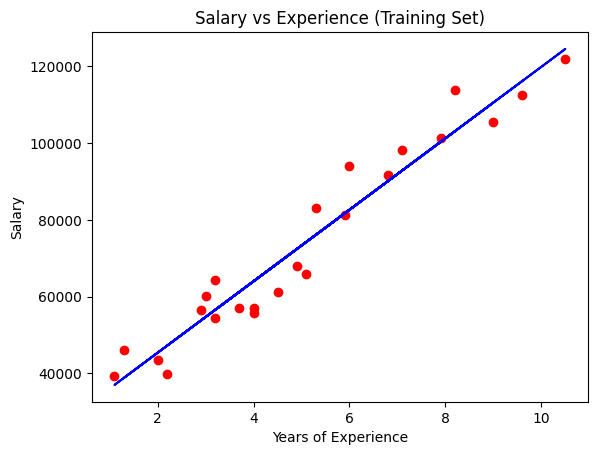

In [16]:
'''
Using matplotlib pyplot module we visualize how would our model be working for case of training set
as using scatter plot we displayed the data values and using the Linearregression line to fit the best possible
solution for the training set in blue.

'''

plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,l_regressor.predict(X_train),color = 'blue')
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

#Visualising the Test Set

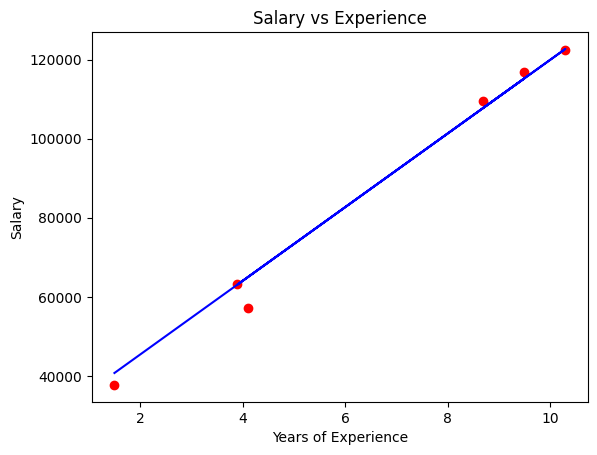

In [17]:
plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_test,Y_predicted,color ='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()

This is a good example of how this model predicting such accurate results because of the linear relation between the dataset. Now this can also be used to predict the salary of an employee say 20 years. Given how accurate the model was.

#Making a single prediction (for example the salary of an employee with 20 years of experience)

In [19]:
y_pred_value = int(l_regressor.predict([[20]]))
print("Estimated Salary is: ",y_pred_value)

Estimated Salary is:  213031


<ipython-input-19-6df36a80519f>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_value = int(l_regressor.predict([[20]]))


Therefore, our model predicts that the salary of an employee with 12 years of experience is around $ 213031.

**Important note:** Notice that the value of the feature (20years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 20 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$20 \rightarrow \textrm{scalar}$

$[20] \rightarrow \textrm{1D array}$

$[[20]] \rightarrow \textrm{2D array}$

In [20]:
print(l_regressor.coef_)
print(l_regressor.intercept_)

[[9312.57512673]]
[26780.09915063]


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9312.5 \times \textrm{YearsExperience} + 26780.09$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.